### 1. Import necessary packages¶, For this exercise we need

pandas,
train_test_split,
LogisticRegression,
pyplot from matplotlib

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#### 2. Load and prepare the dataset
#### Load the dataset into a dataframe named df_data (this step is done for you).
#### Drop the name column. This column is not a feature required by the model.
#### Create a dataframe named X containing all the columns except the status.
#### Create a dataframe named y containing the status.

In [15]:
df_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
df_data = df_data.drop(["name"], axis =1)
X = df_data.drop(["status"], axis =1)
y = df_data['status']


#### 3. Split the dataset into a training set and a test set

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### 4. Create the model


1.   Instantiate a Logistic Regression classifier with a `lbfgs` solver and penalty set to 'none'.
2.   Fit the classifier to the data.

*If the algorithm fails to converge, what change can you make to fix that?*



In [29]:
lr = LogisticRegression(solver = 'lbfgs', penalty = 'none', max_iter = 1000)
lr.fit(X_train, y_train)

/Users/krishnadevabhaktuni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## increasing max_iter to 10000 because the algorithm failed to converge

In [32]:
lr = LogisticRegression(solver = 'lbfgs', penalty = 'none', max_iter = 10000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 5. Calculate Accuracy
Calculate and print the accuracy of the model on the test data.

In [33]:
lr_score = lr.score(X_test, y_test)

print('Accuracy of Logistic Regression without regularization: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression without regularization: 0.878


#### 6. L2 Regularization
Train another model with L2 regularization and compare the accuracy of the new model to the previous one.

In [37]:
lr = LogisticRegression(solver = 'lbfgs', penalty = 'none', max_iter = 10000)
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print("Score on training data: {:.3f}".format(train_score))
print("Score on Test Data: {:.3f}".format(test_score))

Score on training data: 0.863
Score on Test Data: 0.878


In [40]:
lr_regularization = LogisticRegression(solver = 'lbfgs', penalty = 'l2', max_iter = 10000)
lr_regularization.fit(X_train, y_train)

test_score = lr_regularization.score(X_test, y_test)
train_score = lr_regularization.score(X_train, y_train)

print("Score on regularized training set: {:.3f}".format(test_score))
print("Score on regularized test set: {:.3f}".format(train_score))

Score on regularized training set: 0.857
Score on regularized test set: 0.863


### 7. Choose the C parameter
Use a loop to test the effect of varying the C parameter from 0.05 to 1.5 in increments of 0.5. Plot a graph to show the accuracy on the test data versus the accuracy on the training data. Select an appropriate value for C and explain why that may be the best value.

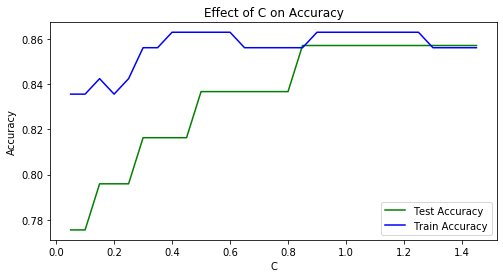

In [41]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()